In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
disease = pd.read_csv("/content/heart_disease.csv")
disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [4]:
disease.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
disease.describe(include = object)

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,3,3,3
top,Male,asymptomatic,normal,FALSE,flat,normal
freq,718,495,542,535,453,354


In [6]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
disease['exang'].value_counts()

exang
FALSE    535
TRUE     337
TURE      36
Name: count, dtype: int64

In [8]:
disease['exang'].replace('TURE','TRUE',inplace = True)

In [9]:
disease['exang'].replace("TRUE",True,inplace=True)
disease['exang'].replace("FALSE",False,inplace=True)


In [10]:
disease.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang          bool
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [11]:
disease.describe(include = object)

,sex,cp,restecg,slope,thal
count,908,908,908,908,908
unique,2,4,3,3,3
top,Male,asymptomatic,normal,flat,normal
freq,718,495,542,453,354


In [12]:
disease.duplicated().sum()

0

In [13]:
disease.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
for i in disease.isna().sum():
  print((i/len(disease))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.828193832599119
0.0
0.0
0.0


<Axes: >

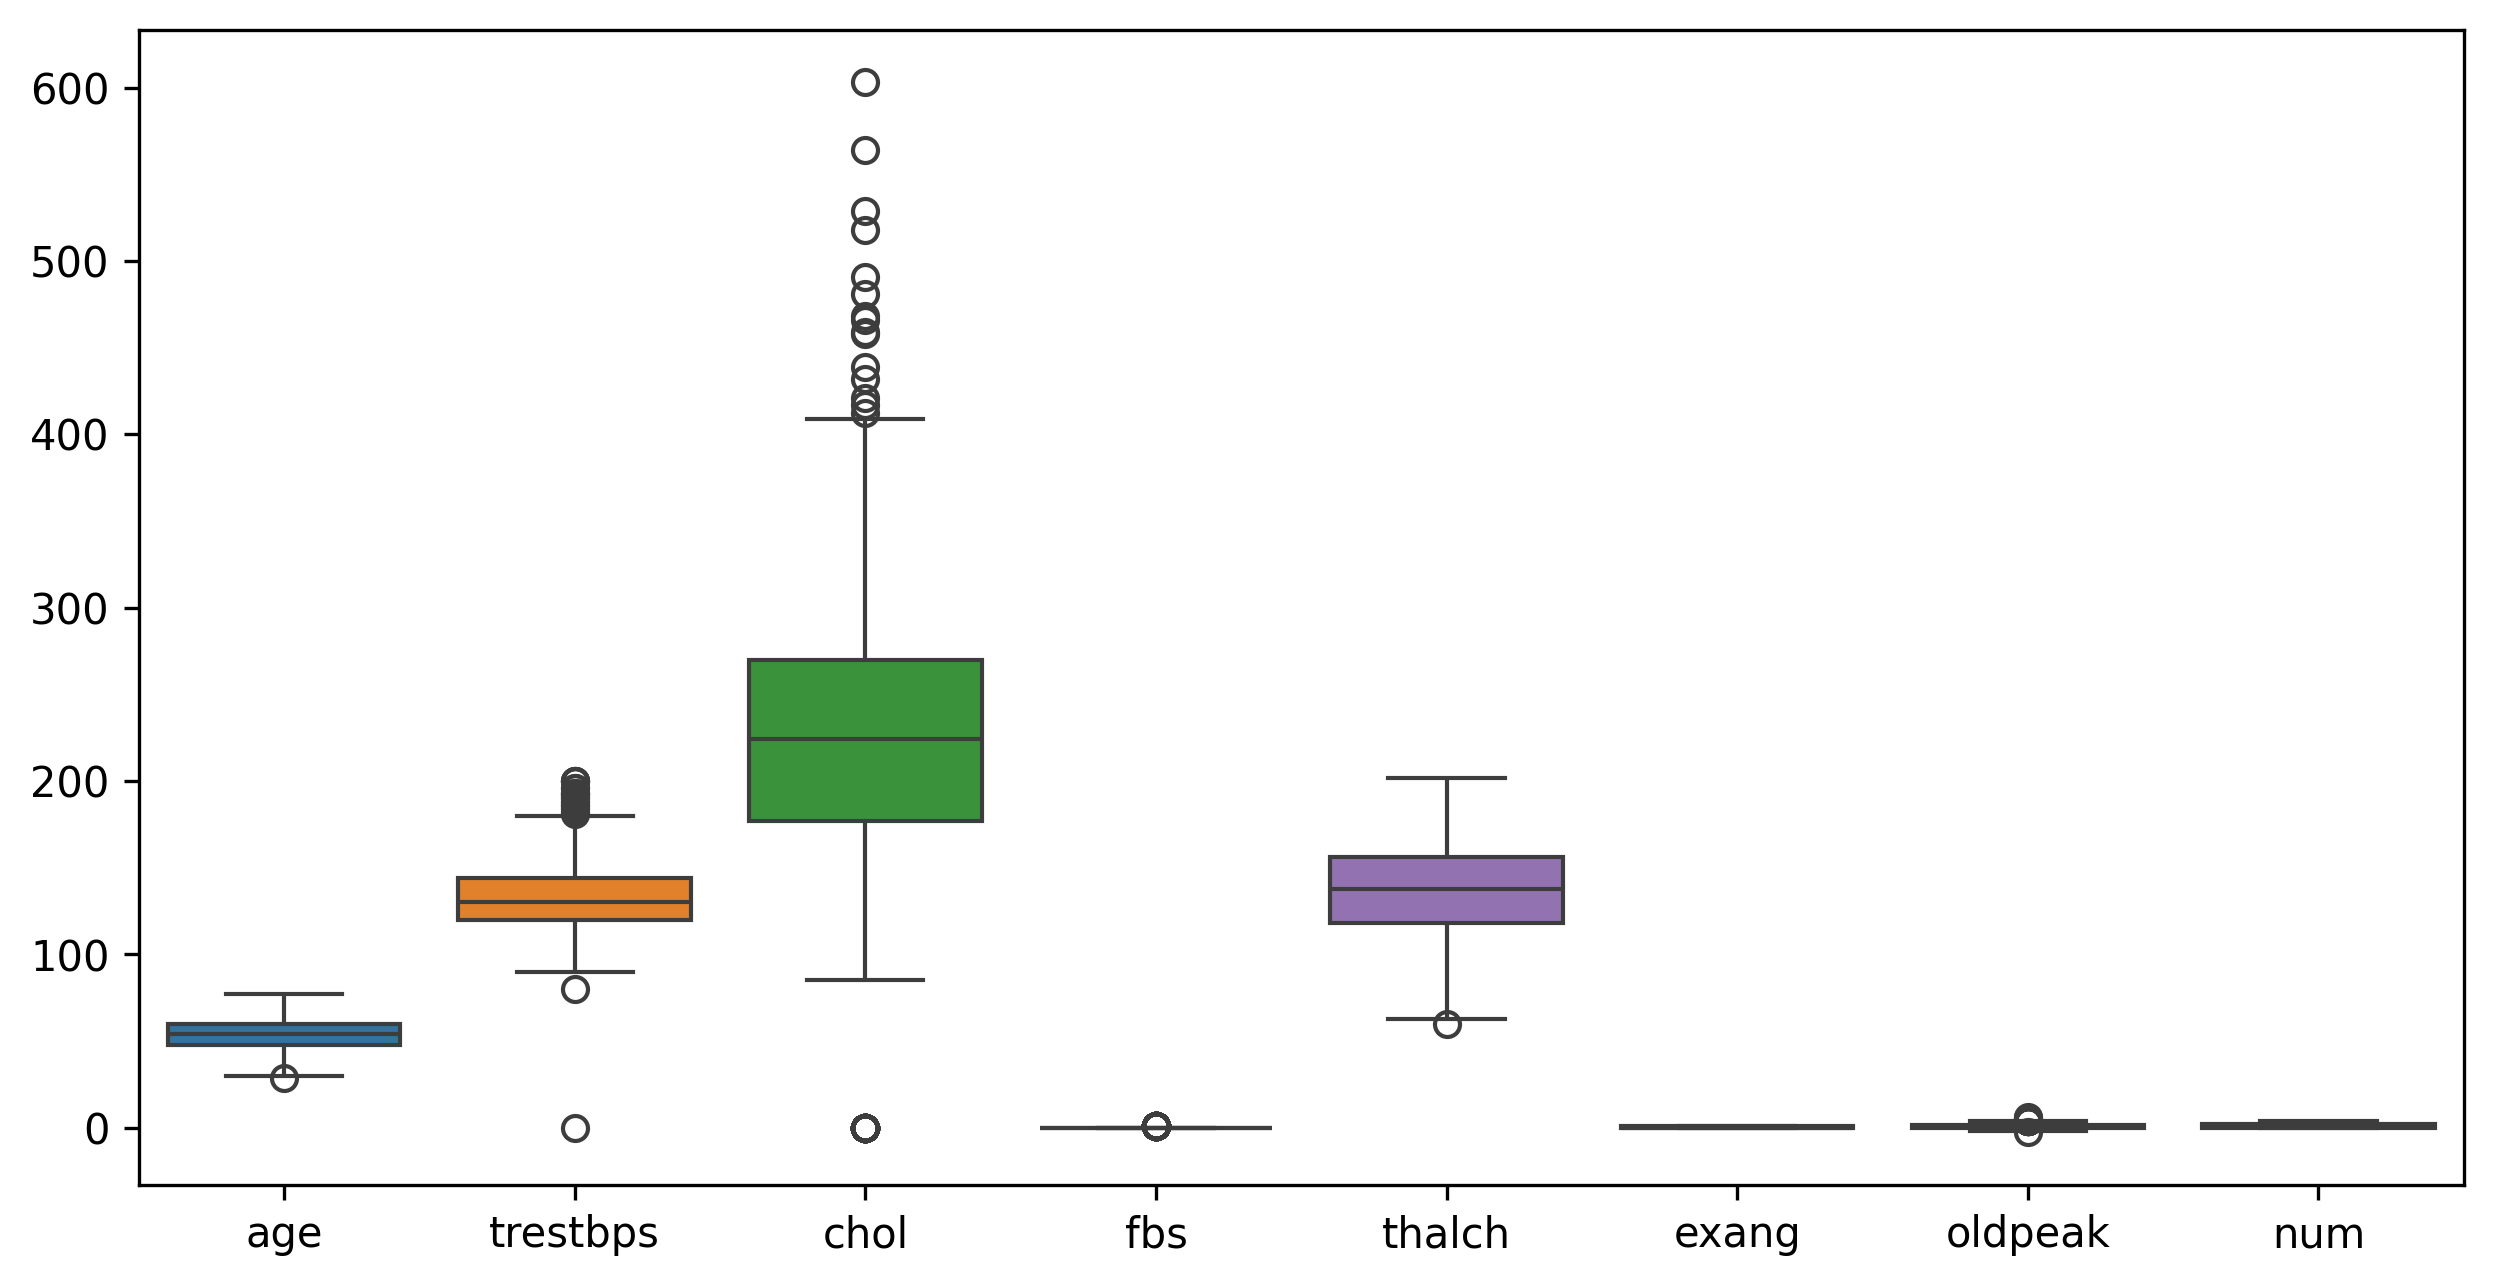

In [15]:
sns.boxplot(disease)

In [16]:
oldpeak_median = disease['oldpeak'].median()
oldpeak_median

0.5

In [17]:
disease['oldpeak'].fillna(oldpeak_median, inplace = True)

In [18]:
disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

outlier's detection


<Axes: >

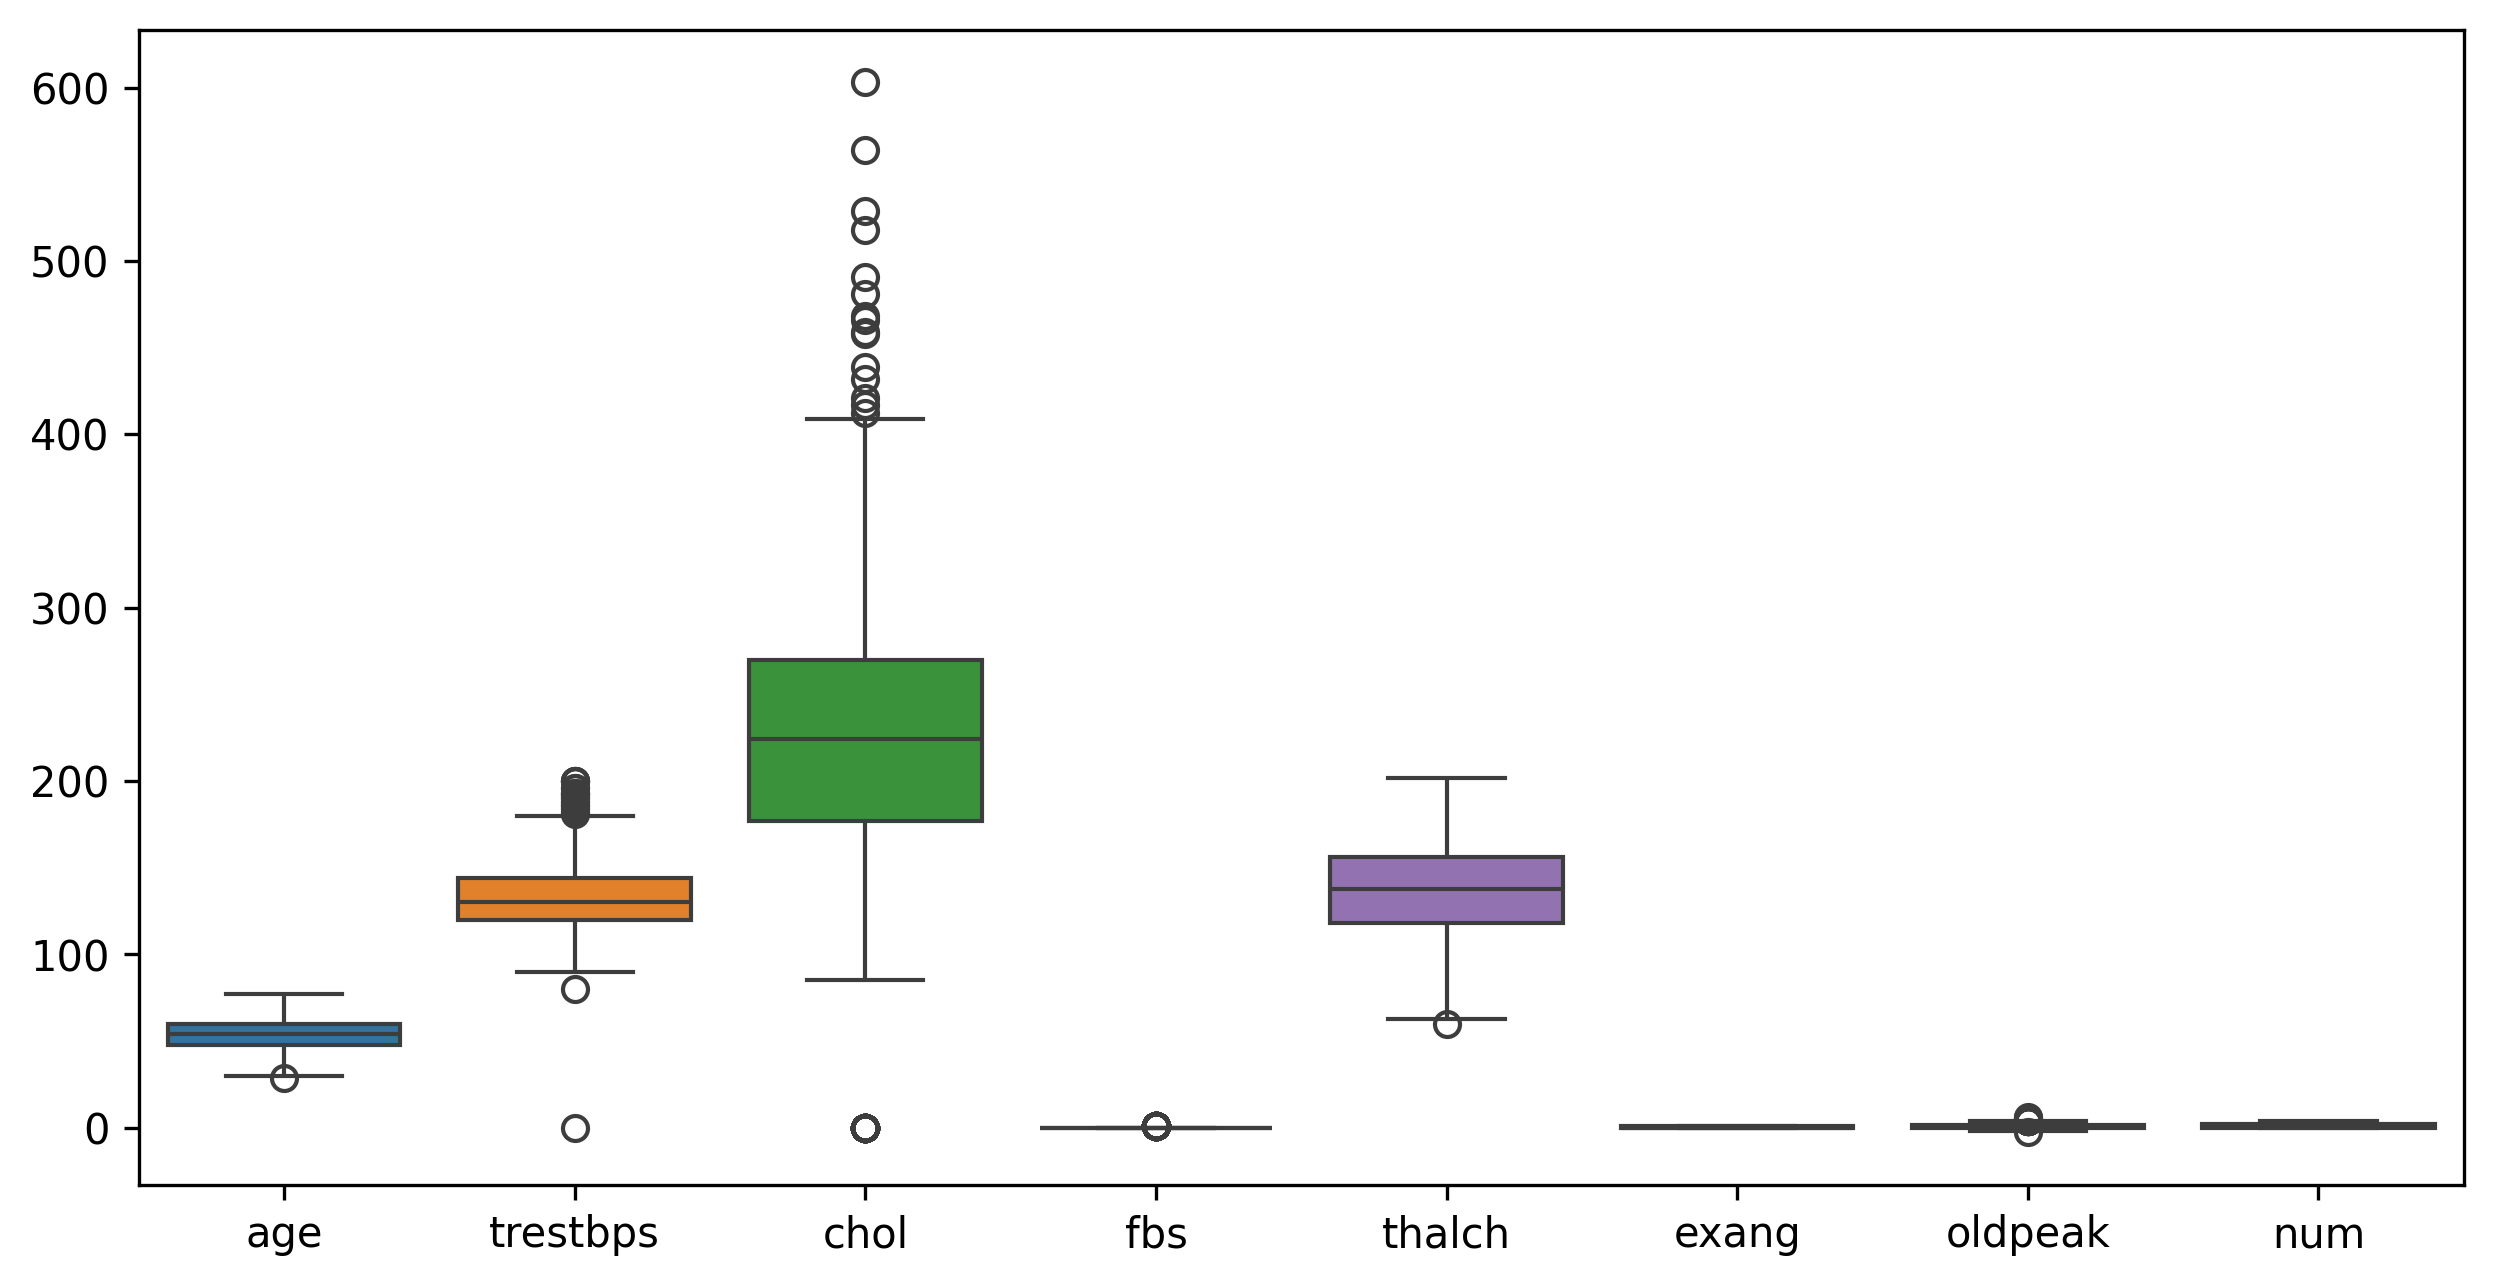

In [19]:
sns.boxplot(disease)

In [20]:
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

<Axes: >

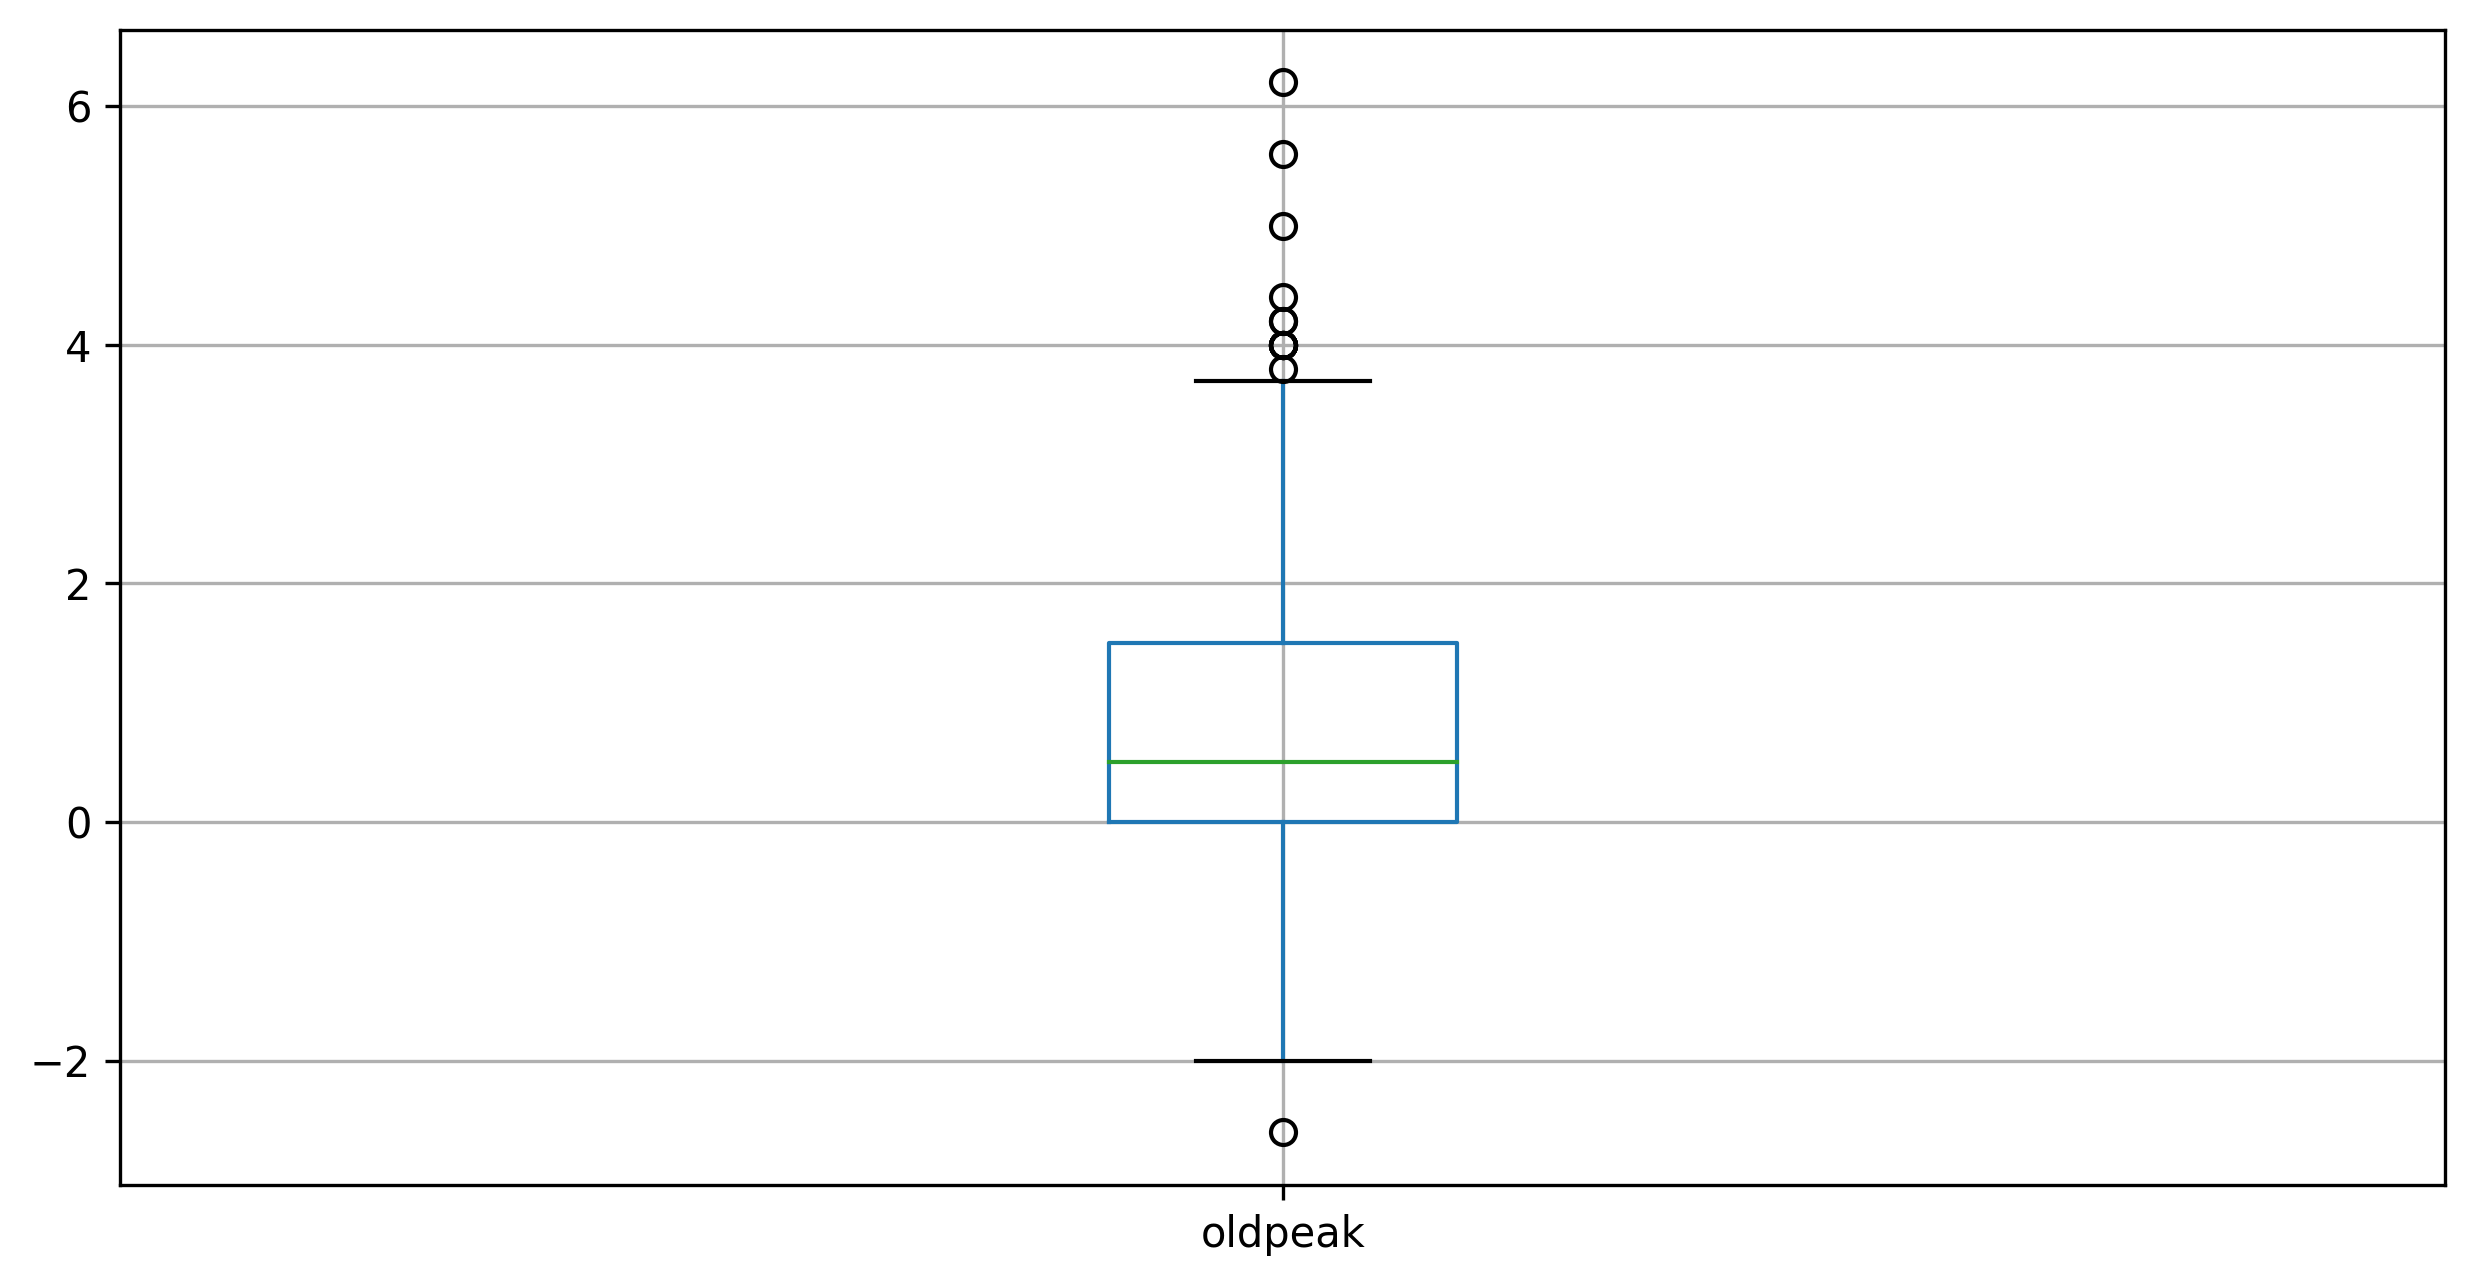

In [21]:
disease.boxplot('oldpeak')

In [22]:
outlier_detection(disease , 'age')

(29.375, 78.375)

In [23]:
disease.loc[disease['age']<29.375,'age'] = 29.375

In [24]:
outlier_detection(disease , 'trestbps')

(84.0, 180.0)

In [25]:
disease.loc[disease['trestbps']>180.0,'trestbps'] = 180.0
disease.loc[disease['trestbps']<84.0,'trestbps'] = 84.0

In [26]:
outlier_detection(disease , 'chol')


(36.875, 409.875)

In [27]:
disease.loc[disease['chol']>409.875,'chol'] = 409.875
disease.loc[disease['chol']<36.875,'chol'] = 36.875

In [28]:
outlier_detection(disease , 'thalch')

(61.0, 213.0)

In [29]:
disease.loc[disease['thalch']<61.0,'thalch'] = 61.0

In [30]:
outlier_detection(disease , 'oldpeak')

(-2.25, 3.75)

In [31]:
disease.loc[disease['oldpeak']>3.75,'oldpeak'] = 3.75
disease.loc[disease['oldpeak']<-2.25,'oldpeak'] = -2.25

<Axes: >

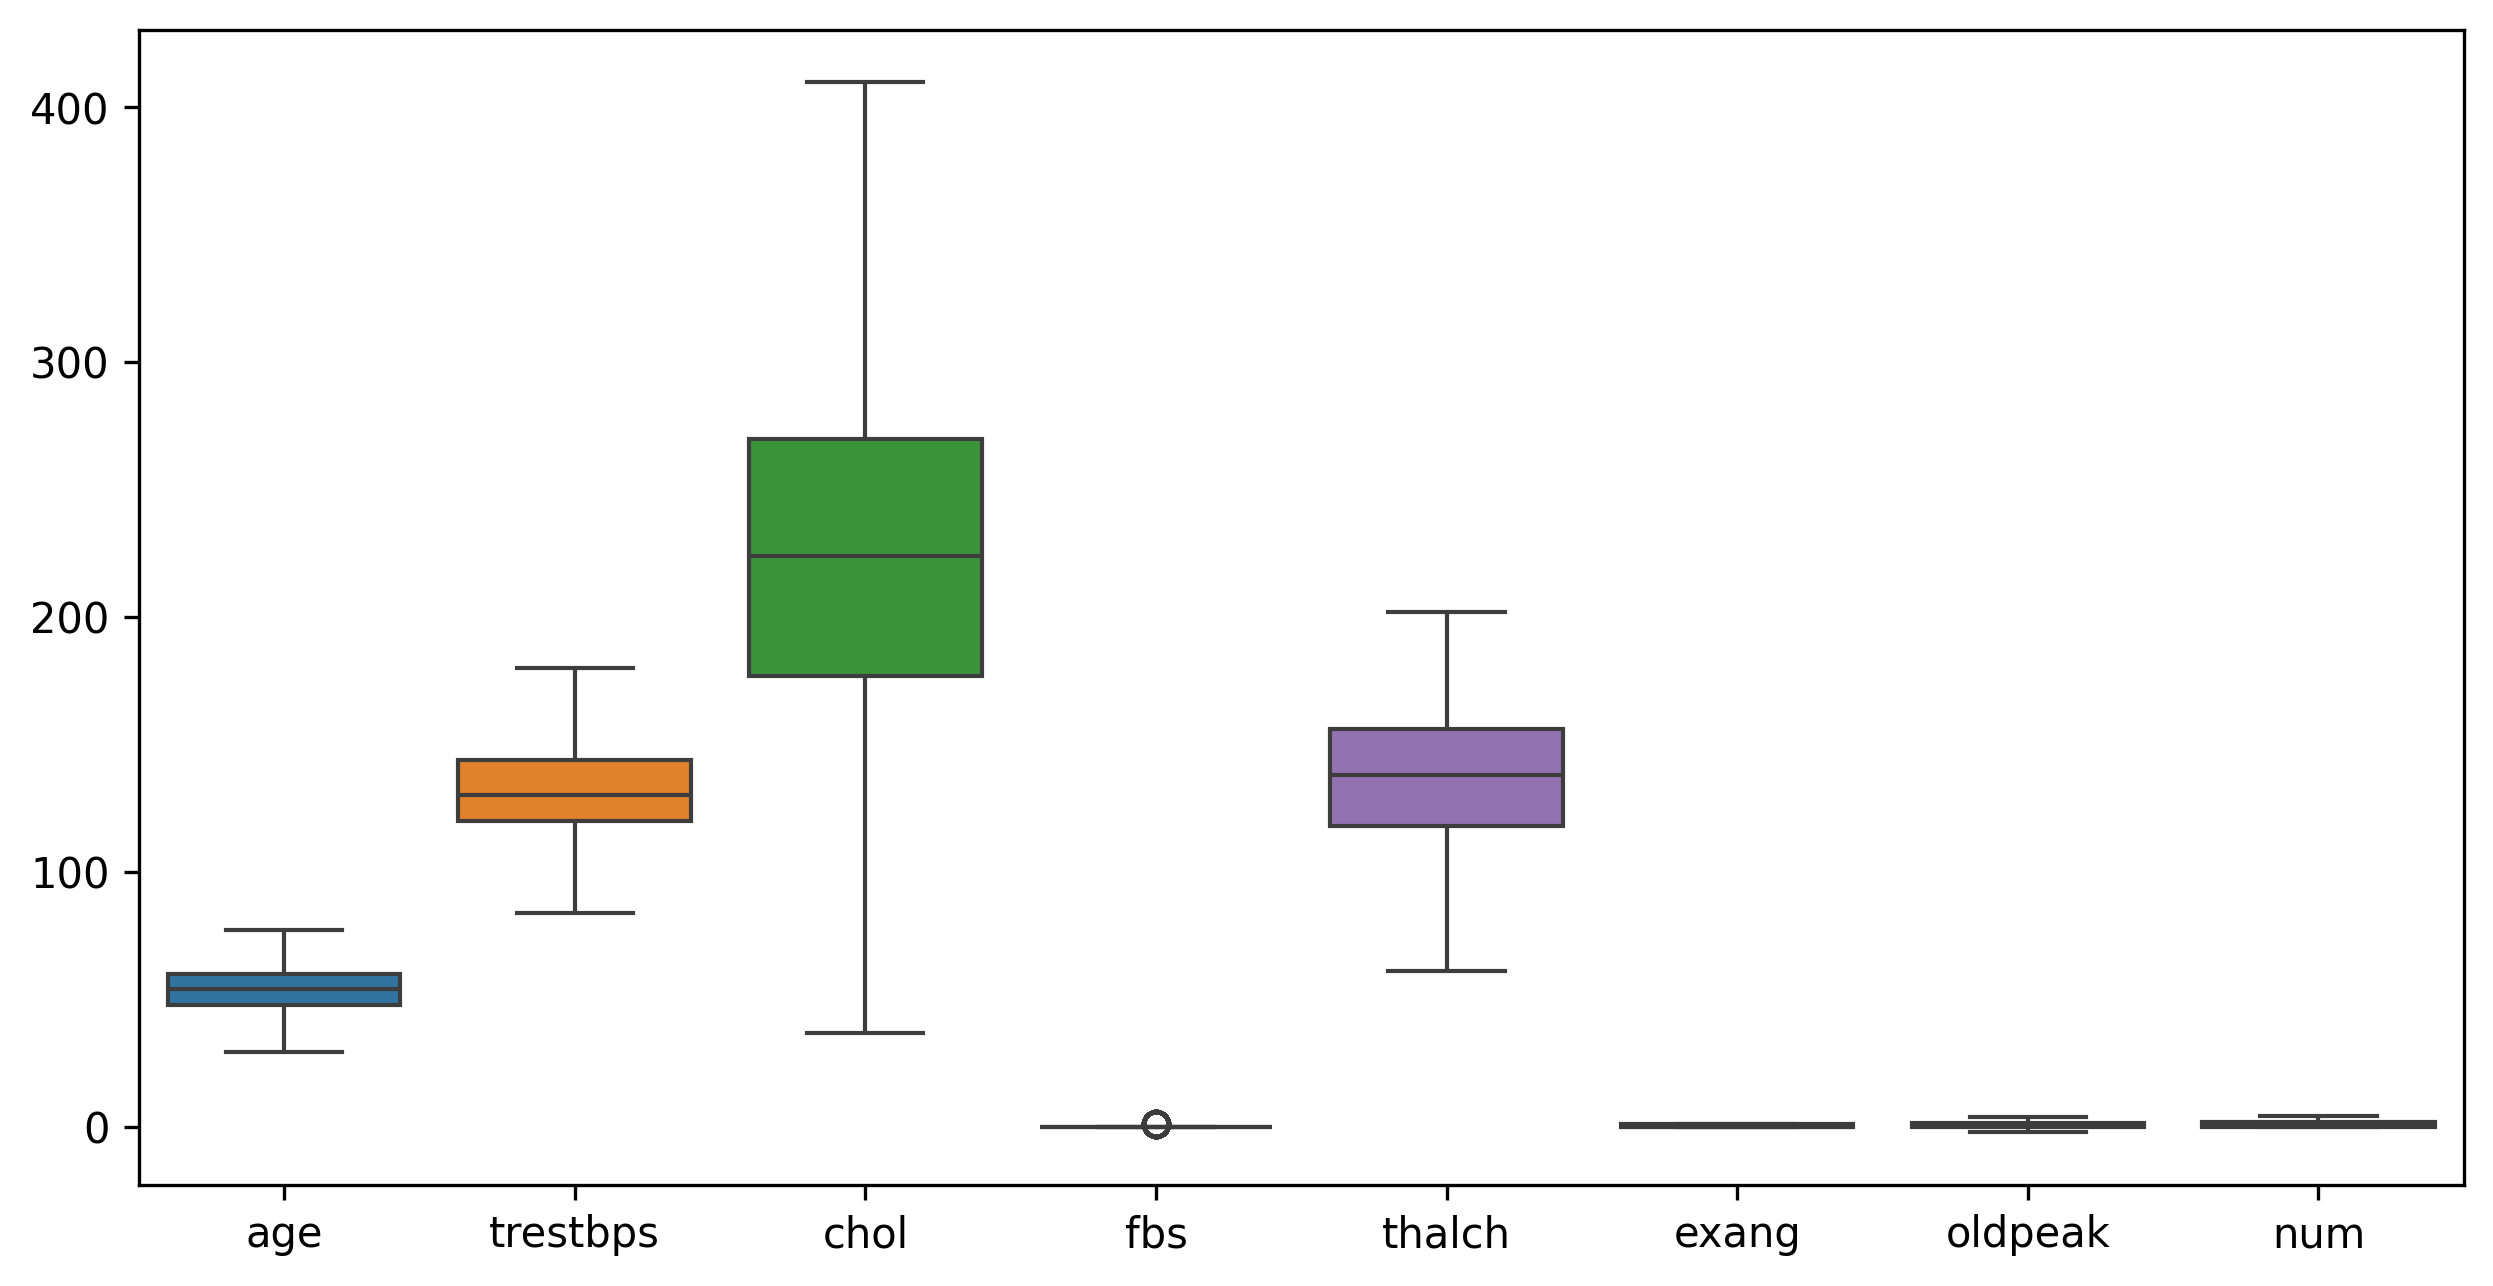

In [32]:
sns.boxplot(disease)

In [33]:
x=disease.iloc[:,0:12]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,Male,typical angina,145,233.000,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect
1,41.0,Male,atypical angina,135,203.000,False,normal,132,False,0.0,flat,fixed defect
2,57.0,Male,asymptomatic,140,192.000,False,normal,148,False,0.4,flat,fixed defect
3,52.0,Male,typical angina,118,186.000,False,lv hypertrophy,190,False,0.0,flat,fixed defect
4,57.0,Male,asymptomatic,110,201.000,False,normal,126,True,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,Male,asymptomatic,125,36.875,False,normal,120,False,1.5,upsloping,normal
904,62.0,Male,asymptomatic,166,170.000,False,st-t abnormality,120,True,3.0,flat,fixed defect
905,56.0,Male,non-anginal,170,36.875,False,lv hypertrophy,123,True,2.5,downsloping,normal
906,56.0,Male,non-anginal,144,208.000,True,st-t abnormality,105,True,0.5,downsloping,normal


In [34]:
y = disease['num']
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

one hot encoding

In [35]:
 x = pd.get_dummies(data = x , columns=['sex','cp','fbs','restecg','exang','slope','thal'])


In [36]:
x

,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,145,233.000,150,2.3,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,41.0,135,203.000,132,0.0,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
2,57.0,140,192.000,148,0.4,False,True,True,False,False,...,True,False,True,False,False,True,False,True,False,False
3,52.0,118,186.000,190,0.0,False,True,False,False,False,...,False,False,True,False,False,True,False,True,False,False
4,57.0,110,201.000,126,1.5,False,True,True,False,False,...,True,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,125,36.875,120,1.5,False,True,True,False,False,...,True,False,True,False,False,False,True,False,True,False
904,62.0,166,170.000,120,3.0,False,True,True,False,False,...,False,True,False,True,False,True,False,True,False,False
905,56.0,170,36.875,123,2.5,False,True,False,False,True,...,False,False,False,True,True,False,False,False,True,False
906,56.0,144,208.000,105,0.5,False,True,False,False,True,...,False,True,False,True,True,False,False,False,True,False


In [37]:
colnames = list(x.columns)
colnames

['age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak',
 'sex_Female',
 'sex_Male',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'fbs_False',
 'fbs_True',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'exang_False',
 'exang_True',
 'slope_downsloping',
 'slope_flat',
 'slope_upsloping',
 'thal_fixed defect',
 'thal_normal',
 'thal_reversable defect']

In [38]:
resultnames = list(y.unique())
resultnames

[0, 1, 2, 3, 4]

train_test_split

In [39]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [89]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.69\nsamples = 726\nvalue = [323, 210, 87, 84, 22]'),
 Text(0.25, 0.625, 'x[2] <= 68.438\ngini = 0.451\nsamples = 338\nvalue = [243, 55, 14, 22, 4]'),
 Text(0.125, 0.375, 'x[22] <= 0.5\ngini = 0.748\nsamples = 38\nvalue = [11, 12, 7, 7, 1]'),
 Text(0.0625, 0.125, 'gini = 0.656\nsamples = 25\nvalue = [11, 9, 3, 2, 0]'),
 Text(0.1875, 0.125, 'gini = 0.698\nsamples = 13\nvalue = [0, 3, 4, 5, 1]'),
 Text(0.375, 0.375, 'x[0] <= 56.5\ngini = 0.378\nsamples = 300\nvalue = [232, 43, 7, 15, 3]'),
 Text(0.3125, 0.125, 'gini = 0.249\nsamples = 206\nvalue = [177, 23, 1, 4, 1]'),
 Text(0.4375, 0.125, 'gini = 0.594\nsamples = 94\nvalue = [55, 20, 6, 11, 2]'),
 Text(0.75, 0.625, 'x[0] <= 59.5\ngini = 0.735\nsamples = 388\nvalue = [80, 155, 73, 62, 18]'),
 Text(0.625, 0.375, 'x[2] <= 60.938\ngini = 0.687\nsamples = 261\nvalue = [62, 123, 38, 29, 9]'),
 Text(0.5625, 0.125, 'gini = 0.708\nsamples = 62\nvalue = [4, 21, 24, 8, 5]'),
 Text(0.6875, 0.125, 'gini = 0.63

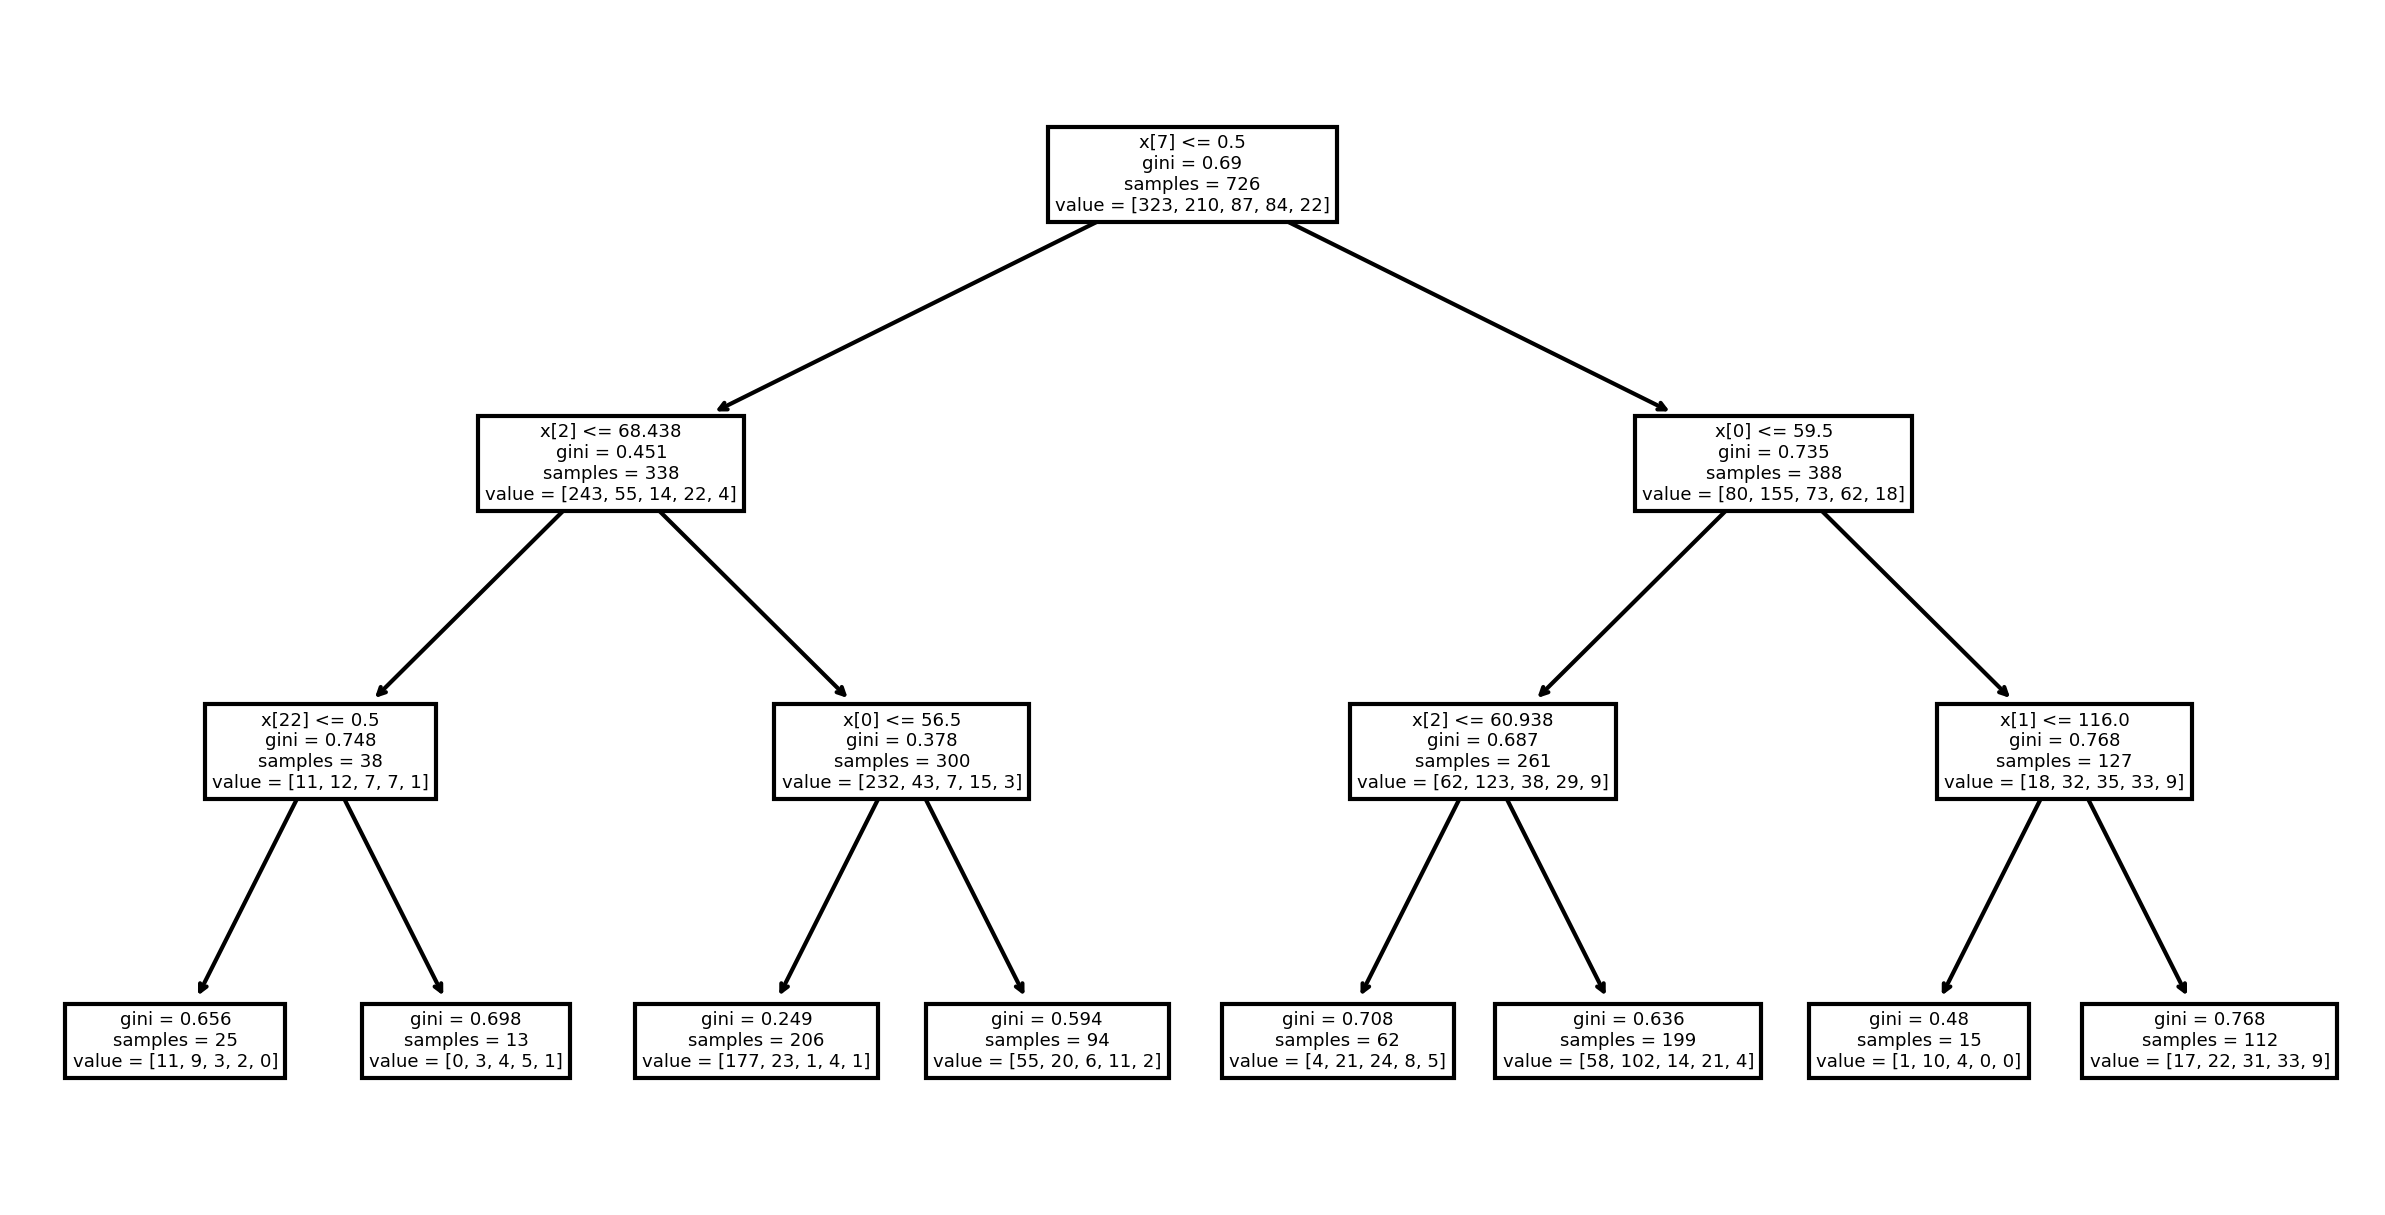

In [90]:
tree.plot_tree(model)

In [91]:
y_train.value_counts()

num
0    323
1    210
2     87
3     84
4     22
Name: count, dtype: int64

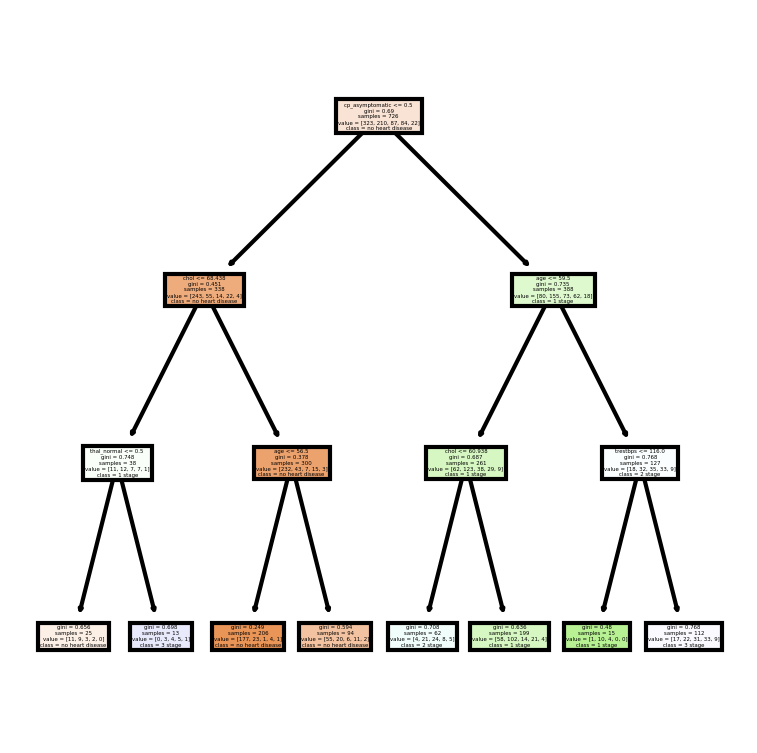

In [92]:
fn=colnames
cn=['no heart disease','1 stage','2 stage ','3 stage','4 stage']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [93]:

# Upgrade pandas
!pip install --upgrade pandas

# Use a different method to count the values
preds = model.predict(x_test)
pd.DataFrame(preds).value_counts()

0    70
1    65
3    33
2    14
Name: count, dtype: int64

In [94]:
model.feature_importances_

array([0.1408043 , 0.04075051, 0.18377744, 0.        , 0.        ,
       0.        , 0.        , 0.60647904, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0281887 , 0.        ])

In [95]:
preds

array([0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 3, 0, 3, 1, 0, 1, 3, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 1, 2, 3, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 3, 2, 1, 0, 0, 0, 0, 3, 0, 0,
       2, 0, 1, 3, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 3, 0, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 0, 3, 2, 0, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 0, 1, 0, 3, 0,
       1, 0, 0, 0, 0, 1, 1, 3, 3, 1, 1, 1, 1, 3, 0, 0, 0, 1, 3, 1, 3, 0,
       2, 3, 1, 3, 3, 3, 0, 1, 3, 0, 0, 3, 1, 3, 3, 1, 3, 2, 1, 0, 3, 0,
       1, 1, 3, 0, 0, 3, 0, 1, 3, 1, 2, 3, 0, 1, 1, 0, 3, 1, 1, 2, 0, 0,
       1, 3, 1, 0, 1, 1])

In [96]:
pd.crosstab(y_test,preds)

col_0,0,1,2,3
num,,,,
0,52,22,0,2
1,11,25,8,11
2,5,8,3,6
3,1,9,3,10
4,1,1,0,4


In [97]:
np.mean(preds==y_test)

0.4945054945054945

In [98]:
ypred = model.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        76
           1       0.38      0.45      0.42        55
           2       0.21      0.14      0.17        22
           3       0.30      0.43      0.36        23
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.49      0.49      0.49       182



In [104]:

# Define the grid of hyperparameters to search
grid = {'criterion': ['entropy'],
        'max_depth': [2],
        'min_samples_split': [2],
        'min_samples_leaf': [1,2]}

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(estimator=dtree, param_grid=grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)



{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [105]:
# Train the decision tree classifier with the best hyperparameters
dtree_best = DecisionTreeClassifier(**grid_search.best_params_)
dtree_best.fit(x_train, y_train)

# Evaluate the decision tree classifier on the test data
y_pred_best = dtree_best.predict(x_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        76
           1       0.39      0.76      0.52        55
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         6

    accuracy                           0.52       182
   macro avg       0.22      0.29      0.24       182
weighted avg       0.41      0.52      0.45       182



[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\nentropy = 1.917\nsamples = 726\nvalue = [323, 210, 87, 84, 22]'),
 Text(0.25, 0.5, 'x[0] <= 55.5\nentropy = 1.291\nsamples = 338\nvalue = [243, 55, 14, 22, 4]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.85\nsamples = 212\nvalue = [175, 28, 1, 7, 1]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.788\nsamples = 126\nvalue = [68, 27, 13, 15, 3]'),
 Text(0.75, 0.5, 'x[4] <= 1.75\nentropy = 2.08\nsamples = 388\nvalue = [80, 155, 73, 62, 18]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.984\nsamples = 271\nvalue = [74, 112, 44, 33, 8]'),
 Text(0.875, 0.16666666666666666, 'entropy = 2.051\nsamples = 117\nvalue = [6, 43, 29, 29, 10]')]

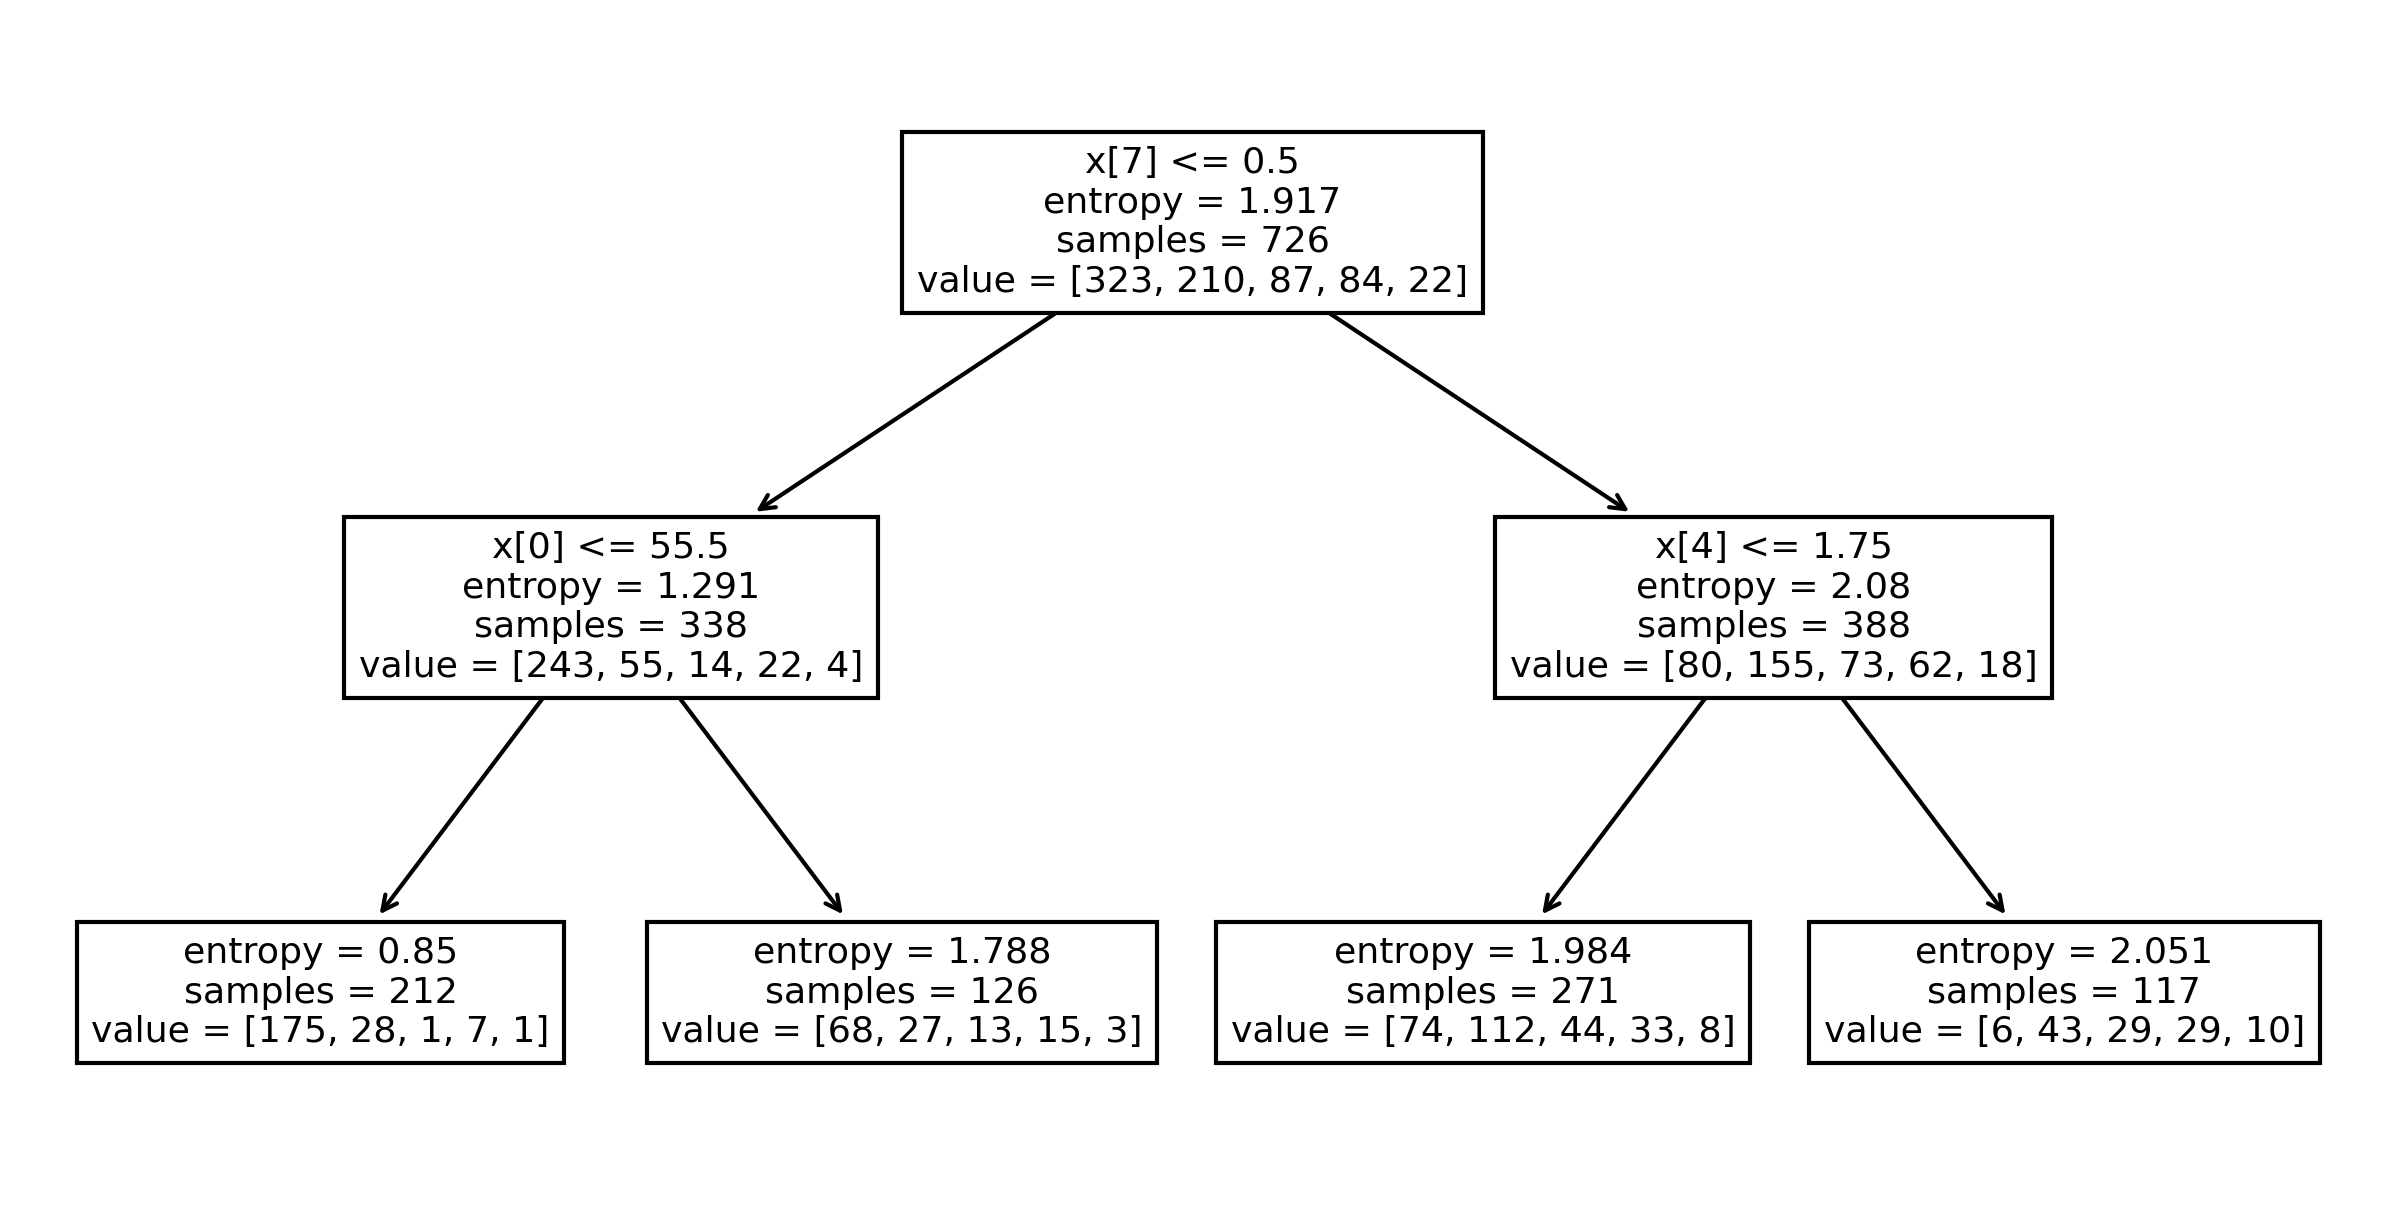

In [106]:
tree.plot_tree(dtree_best)

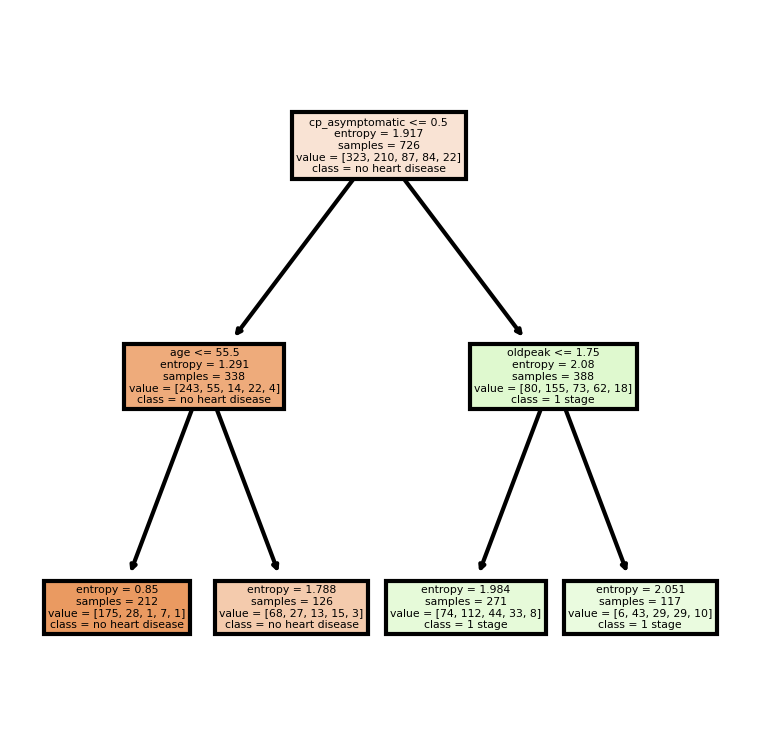

In [107]:
fn=colnames
cn=['no heart disease','1 stage','2 stage ','3 stage','4 stage']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtree_best,
               feature_names = fn,
               class_names=cn,
               filled = True);

Questions

Examples of hyperparameters include the number of nodes and layers in a neural network and the number of branches in a decision tree. Hyperparameters determine key features such as model architecture, learning rate, and model complexity.

Label Encoding is suitable when there is an intrinsic order in the categories, whereas One-Hot Encoding is better for nominal categories.